In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [ ]:
train.info()

In [ ]:
train.head()

In [ ]:
variables

In [27]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [28]:
train[(train['uniqueid'] == 'uniqueid_7867')& (train['country'] == 'Kenya')]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])
train['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [4]:
X = train.drop('bank_account',axis=1)
y = train['bank_account']

In [5]:
from sklearn.preprocessing import MinMaxScaler
def processor(data):
    le = LabelEncoder()
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  


In [6]:
processed_train = processor(X)
processed_test = processor(test)

In [7]:
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y, stratify = y, 
                                                  test_size = 0.1, random_state=101)

In [8]:
from sklearn.svm import SVC

In [9]:
classifier = SVC(class_weight='balanced')

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
# grid = GridSearchCV(classifier,param_grid)

In [10]:
classifier.fit(X_Train,y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#print("Current level: {}".format(.cv_results_))

In [11]:
y_pred = classifier.predict(X_Val)

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_pred,y_val))

Error rate of XGB classifier:  0.20229494262643433


In [13]:
accuracy_score(y_pred,y_val)

0.7977050573735657

In [14]:
confusion_matrix(y_pred,y_val)

array([[1644,   98],
       [ 378,  233]], dtype=int64)

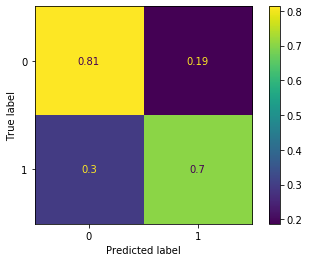

In [18]:
plot_confusion_matrix(classifier,X_Val,y_val,normalize='true')

In [20]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1742
           1       0.70      0.38      0.49       611

    accuracy                           0.80      2353
   macro avg       0.76      0.66      0.68      2353
weighted avg       0.78      0.80      0.78      2353



In [21]:
#Evaluating based on the test dataset
Y_preds = classifier.predict(processed_test)

In [22]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": Y_preds})

In [23]:
submission.sample(5)

,uniqueid,bank_account
2994,uniqueid_9129 x Rwanda,1
8903,uniqueid_9178 x Tanzania,0
9184,uniqueid_9459 x Tanzania,0
6781,uniqueid_7056 x Tanzania,0
5863,uniqueid_11998 x Rwanda,0


In [29]:
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [26]:
submission.to_csv('submission.csv', index = False)
